### Gaussian model of shear frame building with 3 floors

In [ ]:

import numpy as np

import matplotlib.pyplot as plt


# Set seed for reproducibility
np.random.seed(31)

### Index 1 represents floor number and second represents PC coefficients

# First floor
u10 = 0.2
u11 = 0.05
u12 = 0.03


# Second floor
u20 = 0.3
u21 = 0.04
u22 = 0.02


# Third floor
u30 = 0.4
u31 = 0.06
u32 = 0.02


# np.rng(40)

nsamp =  10000
xi1 = np.random.normal(0,1, nsamp)
xi2 = np.random.normal(0,1, nsamp)

U1 = np.zeros((nsamp,1))
U2 = np.zeros((nsamp,1))
U3 = np.zeros((nsamp,1))


U1[:,0] = u10 + u11 *  xi1 + u12 *  xi2

U2[:,0] = u20 + u21 *  xi1 + u22 *  xi2

U3[:,0] = u30 + u31 *  xi1 + u3 *  xi2


# print(xi1)
# print(xi2)
# print(U1)
# print(U2)
# print(U3)


In [ ]:
# Covraince Matrix - Analytical

C = np.zeros((3,3))

C[0,0] = u11**2 + u12**2
C[1,1] = u21**2 + u22**2
C[2,2] = u31**2 + u32**2

C[0,1] = u11*u21 + u12*u22
C[0,2] = u11*u31 + u12*u32
C[1,2] = u21*u31 + u22*u32

C[1,0] = C[0,1]
C[2,0] = C[0,2]
C[2,1] = C[1,2]

print(C)



In [ ]:

from scipy.stats import norm

# Covariance numerical

print(U1.shape)
mu1 = np.mean(U1)
var1 = np.var(U1)

mu2 = np.mean(U2)
var2 = np.var(U2)

mu3 = np.mean(U3)
var3 = np.var(U3)


data = np.zeros((3,nsamp))
data[0,:] = U1.T
data[1,:] = U2.T
data[2,:] = U3.T

print(data.shape)

cov = np.cov(data)


print("Numerical mean and variances")

print(mu1, var1)
print(mu2, var2)
print(mu3, var3)


print("Analytical mean and variances")

print(u10, C[0,0])
print(u20, C[1,1])
print(u30, C[2,2])

x1 =  np.linspace(0.0,0.5, 100)
x2 =  np.linspace(0.15,0.5, 100)
x3 =  np.linspace(0.0,0.7, 200)
p1 = norm.pdf(x1, loc= u10, scale = np.sqrt(C[0,0]))
p2 = norm.pdf(x2, loc= u20, scale = np.sqrt(C[1,1]))
p3 = norm.pdf(x3, loc= u30, scale = np.sqrt(C[2,2]))

print("covariance matrix computed numerically", cov)

print("covariance matrix computed analytically", C)

plt.figure(1)
plt.title("Floor 1")
plt.hist(U1, bins=50, density=True, alpha=0.6, color='g')
plt.plot(x1,p1,label = 'Analytical pdf')
plt.legend()
plt.show()


plt.figure(2)
plt.title("Floor 2")
plt.hist(U2, bins=50, density=True, alpha=0.6, color='g')
plt.plot(x2,p2,label = 'Analytical pdf')
plt.legend()
plt.show()


plt.figure(3)
plt.title("Floor 3")
plt.hist(U3, bins=50, density=True, alpha=0.6, color='g')
plt.plot(x3,p3,label = 'Analytical pdf')
plt.legend()
plt.show()

In [ ]:
from scipy.stats import multivariate_normal

### Analytical joint PDFS 
# sigma1 = np.sqrt(C[0,0])
# sigma2 = np.sqrt(C[1,1])
# sigma3 = np.sqrt(C[2,2])



meanvec12 = np.array([u10, u20])
meanvec13 = np.array([u10, u30])
meanvec23 = np.array([u20, u30])

cov12 =  C[0:2,0:2]
cov13 = C[[0,2]][:,[0,2]]
cov23 =  C[1:3,1:3]


# print(cov13)
# cov23 =  [C[0,0], C[0,0]; C[0,0], C[0,0]]




print(cov12)

In [ ]:
import seaborn as sns

# Plot 2D Histogram
# plt.subplot(1, 2, 1)
# plt.hist2d(U1[:,0], U2[:,0], bins=30, density=True, cmap='viridis')
# plt.colorbar(label='Density')
# plt.title('2D Histogram of Joint PDF : : U1 and U2')
# plt.xlabel('U1')
# plt.ylabel('U2')


x1, x2 = np.meshgrid(np.linspace(0.0, 0.4, 100), np.linspace(0.15, 0.45, 100))
# Pack X and Y into a single 3-dimensional array
pos1 = np.empty(x1.shape + (2,))
pos1[:, :, 0] = x1
pos1[:, :, 1] = x2
# Calculate the multivariate normal PDF
pdf_values = multivariate_normal.pdf(pos1, mean=meanvec12, cov=cov12)



plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.contourf(x1, x2, pdf_values, cmap='viridis')
plt.colorbar(label='Probability Density')
plt.title('Joint Probability Density Function (PDF)')
plt.xlabel('U1')
plt.ylabel('U2')
plt.show()

# Plot KDE
plt.subplot(1, 2, 2)
sns.kdeplot(x = U1[:,0], y = U2[:,0], fill=True, cmap='viridis', bw_adjust=0.5)
plt.title('KDE of Joint PDF : : U1 and U2')
plt.xlabel('U1')
plt.ylabel('U2')
plt.show()


In [ ]:

# Plot 2D Histogram
plt.figure(figsize=(12, 5))

# plt.subplot(1, 2, 1)
# plt.hist2d(U2[:,0], U3[:,0], bins=30, density=True, cmap='viridis')
# plt.colorbar(label='Density')
# plt.title('2D Histogram of Joint PDF : U2 and U3')
# plt.xlabel('U2')
# plt.ylabel('U3')


x2, x3 = np.meshgrid(np.linspace(0.0, 0.4, 100), np.linspace(0.2, 0.6, 100))
# Pack X and Y into a single 3-dimensional array
pos2 = np.empty(x2.shape + (2,))
pos2[:, :, 0] = x2
pos2[:, :, 1] = x3
# Calculate the multivariate normal PDF
pdf_values = multivariate_normal.pdf(pos2, mean=meanvec23, cov=cov23)



plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.contourf(x2, x3, pdf_values, cmap='viridis')
plt.colorbar(label='Probability Density')
plt.title('Joint Probability Density Function (PDF)')
plt.xlabel('U2')
plt.ylabel('U3')
plt.show()


# Plot KDE
plt.subplot(1, 2, 2)
sns.kdeplot(x = U2[:,0], y = U3[:,0], fill=True, cmap='viridis', bw_adjust=0.5)
plt.title('KDE of Joint PDF : U2 and U3')
plt.xlabel('U2')
plt.ylabel('U3')

plt.tight_layout()
plt.show()

In [ ]:

# Plot 2D Histogram
plt.figure(figsize=(12, 5))


x1, x3 = np.meshgrid(np.linspace(0.0, 0.45, 100), np.linspace(0.2, 0.6, 100))

# Pack X and Y into a single 3-dimensional array
pos3 = np.empty(x1.shape + (2,))
pos3[:, :, 0] = x1
pos3[:, :, 1] = x3
# Calculate the multivariate normal PDF
pdf_values = multivariate_normal.pdf(pos3, mean=meanvec13, cov=cov13)


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.contourf(x1, x3, pdf_values, cmap='viridis')
plt.colorbar(label='Probability Density')
plt.title('Joint Probability Density Function (PDF)')
plt.xlabel('U1')
plt.ylabel('U3')
plt.show()


# Plot KDE
plt.subplot(1, 2, 2)
sns.kdeplot(x = U1[:,0], y = U3[:,0], fill=True, cmap='viridis', bw_adjust=0.5)
plt.title('KDE of Joint PDF : U1 and U3')
plt.xlabel('U1')
plt.ylabel('U3')

plt.tight_layout()
plt.show()

#### KALMAN FILTER UPDATE

#### Measuring only 1 floor

P_k is [[0.0034 0.0026 0.0036]
 [0.0026 0.002  0.0028]
 [0.0036 0.0028 0.004 ]]
H_k is [[1. 0. 0.]]
[0.48409417]
iteration step
 0
data is 
 [0.68409417]
Kalman gain is 
 [[0.06367041]
 [0.04868914]
 [0.06741573]]
x_k is 
 0 [0.2 0.3 0.4]
x_a is 
 [0.23082248 0.32357013 0.43263556]
forecast variance is 
 0 [[0.0034 0.0026 0.0036]
 [0.0026 0.002  0.0028]
 [0.0036 0.0028 0.004 ]]
updated variance is 
 [[0.00318352 0.00243446 0.00337079]
 [0.00243446 0.00187341 0.00262472]
 [0.00337079 0.00262472 0.0037573 ]]


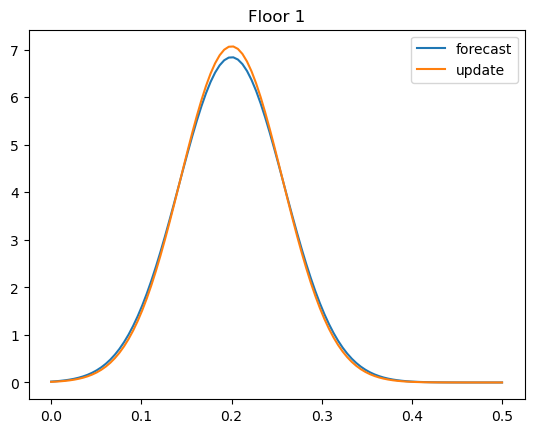

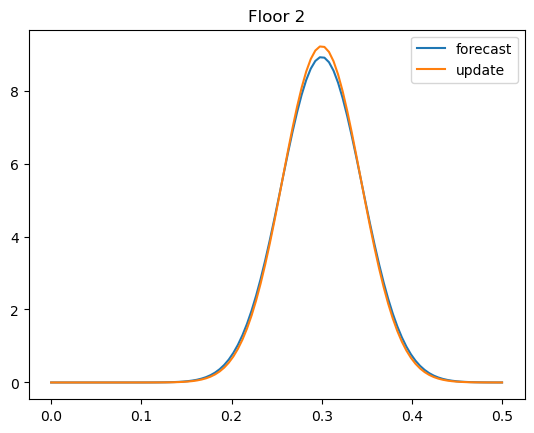

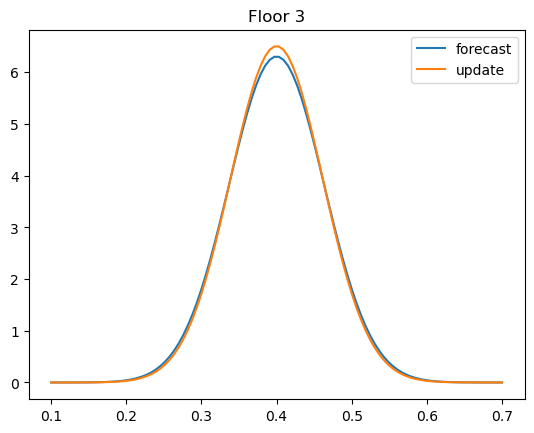

In [1]:

import numpy as np

import matplotlib.pyplot as plt

from scipy.stats import norm

### Index 1 represents floor number and second represents PC coefficients

# First floor
u10 = 0.2
u11 = 0.05
u12 = 0.03


# Second floor
u20 = 0.3
u21 = 0.04
u22 = 0.02


# Third floor
u30 = 0.4
u31 = 0.06
u32 = 0.02



# Covraince Matrix - Analytical

C = np.zeros((3,3))

C[0,0] = u11**2 + u12**2
C[1,1] = u21**2 + u22**2
C[2,2] = u31**2 + u32**2

C[0,1] = u11*u21 + u12*u22
C[0,2] = u11*u31 + u12*u32
C[1,2] = u21*u31 + u22*u32

C[1,0] = C[0,1]
C[2,0] = C[0,2]
C[2,1] = C[1,2]

# print(C)


# Mean value of the PC coefficents
x_k = np.array([u10,u20,u30])


statesize = 3
observed = 1

## Covariance of the state
P_k = np.zeros((statesize,statesize))
P_k = C
print("P_k is", P_k)


x1 =  np.linspace(0.0,0.5, 100)

x2 =  np.linspace(0.0,0.5, 100)

x3 =  np.linspace(0.1,0.7, 100)



H_k = np.zeros((observed,statesize))

H_k[0,0] = 1

# H_k[1,1] = 1

# H_k[2,2] = 1


print("H_k is",H_k)
# np.array([[1, 0, 0], [0,0,0], [0,0,0]])

np.random.seed(106)
# Noise strength
Gamma = 0.05
# epsilon = np.random.normal(0,np.sqrt(Gamma),1)

# print(epsilon)

p1 = norm.pdf(x1, loc= x_k[0], scale = np.sqrt(P_k[0,0]))
p2 = norm.pdf(x2, loc= x_k[1], scale = np.sqrt(P_k[1,1]))
p3 = norm.pdf(x3, loc= x_k[2], scale = np.sqrt(P_k[2,2]))


nsteps = 1

epsilon = np.random.normal(0,np.sqrt(Gamma),nsteps)

print(epsilon)

for i in range(0,nsteps):


    print("iteration step\n",i)


    d_k = H_k @ x_k + epsilon[i]

    print("data is \n" ,d_k)

    K_g = P_k @ H_k.T @ np.linalg.inv(H_k @ P_k @ H_k.T + Gamma)

    print("Kalman gain is \n", K_g)

    ### Update state

    x_a = x_k + K_g @ (d_k - H_k @ x_k)

    print("x_k is \n", i, x_k)
    print("x_a is \n", x_a)

    P_a = (np.identity(statesize) - K_g @ H_k) @ P_k

    print("forecast variance is \n",i, P_k)
    print("updated variance is \n", P_a)


    # p1 = norm.pdf(x1, loc= x_k[0], scale = np.sqrt(P_k[0,0]))
    # p2 = norm.pdf(x2, loc= x_k[1], scale = np.sqrt(P_k[1,1]))
    # p3 = norm.pdf(x3, loc= x_k[2], scale = np.sqrt(P_k[2,2]))

    p11 = norm.pdf(x1, loc= u10, scale = np.sqrt(P_a[0,0]))
    p22 = norm.pdf(x2, loc= u20, scale = np.sqrt(P_a[1,1]))
    p33 = norm.pdf(x3, loc= u30, scale = np.sqrt(P_a[2,2]))

    plt.figure(i)
    plt.title("Floor 1")
    plt.plot(x1,p1,label = 'forecast')
    plt.plot(x1,p11,label = 'update')
    plt.legend()
    plt.show()

    plt.figure(i+1)
    plt.title("Floor 2")
    plt.plot(x2,p2,label = 'forecast')
    plt.plot(x2,p22,label = 'update')
    plt.legend()
    plt.show()

    plt.figure(i+2)
    plt.title("Floor 3")
    plt.plot(x3,p3,label = 'forecast')
    plt.plot(x3,p33,label = 'update')
    plt.legend()
    plt.show()

    # x_k = x_a
    # P_k = P_a



In [2]:
p11 = norm.pdf(x1, loc= x_a[0], scale = np.sqrt(P_a[0,0]))
p22 = norm.pdf(x2, loc= x_a[1], scale = np.sqrt(P_a[1,1]))
p33 = norm.pdf(x3, loc= x_a[2], scale = np.sqrt(P_a[2,2]))

print(x_a[0])
print(x_a[1])
print(x_a[2])

np.savez('pdf_update_1floor.npz', x = p11,y = p22,z = p33)

0.23082247516057633
0.3235701280639701
0.43263556193472785
